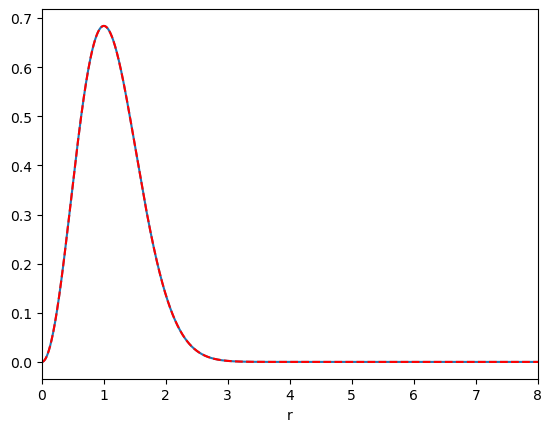

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 600                                                   # Truncation ordem

L0 = 2                                               # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)                                    

r0 = 0

A0 = 0.9298       # 0.9298 -> disperse ;  0.929 -> colapse 



sigma = 1

Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))       # Phi initial data (Verificado) # \phi_0 = A0*r^2e^(..)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,10,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))      


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()



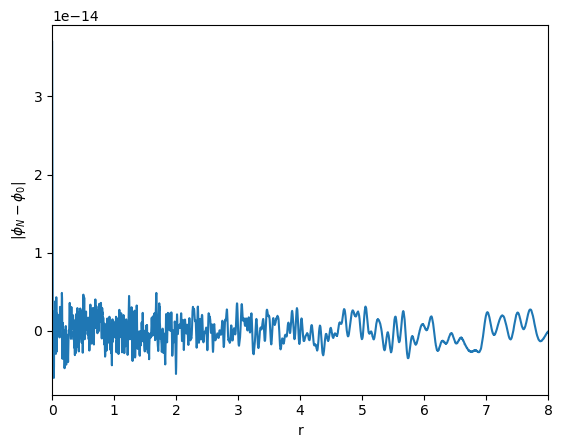

In [2]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [3]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001
  
Chi=np.dot(c0,psi)    
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)     

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tol = 1e-40    # tolerance

# Newton Raphson loop
for i in range(N_int):
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tol:
    break
  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


0.001000225587865521 2.9157988686153884e-07 7.970705554051174e-09 7.599146221337512e-09 2.2818272446922026e-09 6.113355059583467e-10 1.5910391763299387e-10 4.12013922322584e-11 1.0661065293816262e-11 2.758286354580374e-12 7.136273609544654e-13 1.8463027582242377e-13 4.7767698003558096e-14 1.2358498807127072e-14 3.1974012594747614e-15 8.272343059291013e-16 2.140227750384449e-16 5.5372147233591376e-17 1.4325928461087307e-17 3.70642448484313e-18 9.589527670583194e-19 2.480660423017068e-19 6.420833336673826e-20 1.6607504973538985e-20 4.288520596307242e-21 1.1006581811650603e-21 3.0304207478846055e-22 3.698911039963062e-23 3.4770653673862746e-24 

Field equations

In [4]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    

Quadrature Integration

In [5]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
qrSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
qrrSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  

#Alpha_0 = 1 + np.dot(al0, psi_0) 

In [6]:
# Runge Kutta 4th order

h = 0.001   # step size
tf = 12

It = int(tf/h)


t = 0

Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

Alpha_origin1 = np.zeros([It])
phi_origin1 = np.zeros([It])

t1 = np.linspace(0, tf, len(Alpha_origin)) 

V = 0
 
while t <= tf:
 
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**(1/2))    # L2 error of HC 
  
  # Alpha origin
  Alpha_origin.append(1 + np.dot(al0, psi_0))
#  print(Alpha_origin)
  
  # Phi origin:  
  phi_origin.append(np.dot(a0, psi_0))
#  print(phi_origin)
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
  print(t)
    
#  if t > 9:
#    h = 0.0001

    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
  

t1 = np.linspace(0, tf, len(Alpha_origin)) 




0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.010000000000000002
0.011000000000000003
0.012000000000000004
0.013000000000000005
0.014000000000000005
0.015000000000000006
0.016000000000000007
0.017000000000000008
0.01800000000000001
0.01900000000000001
0.02000000000000001
0.02100000000000001
0.022000000000000013
0.023000000000000013
0.024000000000000014
0.025000000000000015
0.026000000000000016
0.027000000000000017
0.028000000000000018
0.02900000000000002
0.03000000000000002
0.03100000000000002
0.03200000000000002
0.03300000000000002
0.03400000000000002
0.035000000000000024
0.036000000000000025
0.037000000000000026
0.03800000000000003
0.03900000000000003
0.04000000000000003
0.04100000000000003
0.04200000000000003
0.04300000000000003
0.04400000000000003
0.04500000000000003
0.046000000000000034
0.047000000000000035
0.048000000000000036
0.04900000000000004
0.05000000000000004
0.05100000000000004
0.05200000000000004
0.05300000000000004
0.05400000000000004
0.05500000

0.4230000000000003
0.4240000000000003
0.4250000000000003
0.4260000000000003
0.4270000000000003
0.4280000000000003
0.4290000000000003
0.4300000000000003
0.4310000000000003
0.43200000000000033
0.43300000000000033
0.43400000000000033
0.43500000000000033
0.43600000000000033
0.43700000000000033
0.43800000000000033
0.43900000000000033
0.44000000000000034
0.44100000000000034
0.44200000000000034
0.44300000000000034
0.44400000000000034
0.44500000000000034
0.44600000000000034
0.44700000000000034
0.44800000000000034
0.44900000000000034
0.45000000000000034
0.45100000000000035
0.45200000000000035
0.45300000000000035
0.45400000000000035
0.45500000000000035
0.45600000000000035
0.45700000000000035
0.45800000000000035
0.45900000000000035
0.46000000000000035
0.46100000000000035
0.46200000000000035
0.46300000000000036
0.46400000000000036
0.46500000000000036
0.46600000000000036
0.46700000000000036
0.46800000000000036
0.46900000000000036
0.47000000000000036
0.47100000000000036
0.47200000000000036
0.4730000

0.8520000000000006
0.8530000000000006
0.8540000000000006
0.8550000000000006
0.8560000000000006
0.8570000000000007
0.8580000000000007
0.8590000000000007
0.8600000000000007
0.8610000000000007
0.8620000000000007
0.8630000000000007
0.8640000000000007
0.8650000000000007
0.8660000000000007
0.8670000000000007
0.8680000000000007
0.8690000000000007
0.8700000000000007
0.8710000000000007
0.8720000000000007
0.8730000000000007
0.8740000000000007
0.8750000000000007
0.8760000000000007
0.8770000000000007
0.8780000000000007
0.8790000000000007
0.8800000000000007
0.8810000000000007
0.8820000000000007
0.8830000000000007
0.8840000000000007
0.8850000000000007
0.8860000000000007
0.8870000000000007
0.8880000000000007
0.8890000000000007
0.8900000000000007
0.8910000000000007
0.8920000000000007
0.8930000000000007
0.8940000000000007
0.8950000000000007
0.8960000000000007
0.8970000000000007
0.8980000000000007
0.8990000000000007
0.9000000000000007
0.9010000000000007
0.9020000000000007
0.9030000000000007
0.9040000000

1.2889999999999688
1.2899999999999687
1.2909999999999686
1.2919999999999685
1.2929999999999684
1.2939999999999683
1.2949999999999682
1.295999999999968
1.296999999999968
1.2979999999999678
1.2989999999999677
1.2999999999999676
1.3009999999999675
1.3019999999999674
1.3029999999999673
1.3039999999999672
1.304999999999967
1.305999999999967
1.3069999999999669
1.3079999999999667
1.3089999999999666
1.3099999999999665
1.3109999999999664
1.3119999999999663
1.3129999999999662
1.313999999999966
1.314999999999966
1.3159999999999659
1.3169999999999658
1.3179999999999656
1.3189999999999655
1.3199999999999654
1.3209999999999653
1.3219999999999652
1.322999999999965
1.323999999999965
1.3249999999999649
1.3259999999999648
1.3269999999999647
1.3279999999999645
1.3289999999999644
1.3299999999999643
1.3309999999999642
1.331999999999964
1.332999999999964
1.3339999999999639
1.3349999999999638
1.3359999999999637
1.3369999999999636
1.3379999999999634
1.3389999999999633
1.3399999999999632
1.340999999999963
1.34

1.7259999999999207
1.7269999999999206
1.7279999999999205
1.7289999999999204
1.7299999999999203
1.7309999999999202
1.73199999999992
1.73299999999992
1.7339999999999198
1.7349999999999197
1.7359999999999196
1.7369999999999195
1.7379999999999194
1.7389999999999193
1.7399999999999192
1.740999999999919
1.741999999999919
1.7429999999999188
1.7439999999999187
1.7449999999999186
1.7459999999999185
1.7469999999999184
1.7479999999999183
1.7489999999999182
1.749999999999918
1.750999999999918
1.7519999999999178
1.7529999999999177
1.7539999999999176
1.7549999999999175
1.7559999999999174
1.7569999999999173
1.7579999999999172
1.758999999999917
1.759999999999917
1.7609999999999169
1.7619999999999167
1.7629999999999166
1.7639999999999165
1.7649999999999164
1.7659999999999163
1.7669999999999162
1.767999999999916
1.768999999999916
1.7699999999999159
1.7709999999999158
1.7719999999999156
1.7729999999999155
1.7739999999999154
1.7749999999999153
1.7759999999999152
1.776999999999915
1.777999999999915
1.77899

2.1659999999998725
2.1669999999998724
2.1679999999998723
2.168999999999872
2.169999999999872
2.170999999999872
2.171999999999872
2.1729999999998717
2.1739999999998716
2.1749999999998715
2.1759999999998714
2.1769999999998713
2.177999999999871
2.178999999999871
2.179999999999871
2.180999999999871
2.1819999999998707
2.1829999999998706
2.1839999999998705
2.1849999999998704
2.1859999999998703
2.18699999999987
2.18799999999987
2.18899999999987
2.18999999999987
2.1909999999998697
2.1919999999998696
2.1929999999998695
2.1939999999998694
2.1949999999998693
2.195999999999869
2.196999999999869
2.197999999999869
2.198999999999869
2.1999999999998687
2.2009999999998686
2.2019999999998685
2.2029999999998684
2.2039999999998683
2.204999999999868
2.205999999999868
2.206999999999868
2.207999999999868
2.2089999999998677
2.2099999999998676
2.2109999999998675
2.2119999999998674
2.2129999999998673
2.213999999999867
2.214999999999867
2.215999999999867
2.216999999999867
2.2179999999998667
2.2189999999998666
2.

2.6089999999998237
2.6099999999998236
2.6109999999998235
2.6119999999998234
2.6129999999998232
2.613999999999823
2.614999999999823
2.615999999999823
2.616999999999823
2.6179999999998227
2.6189999999998226
2.6199999999998225
2.6209999999998224
2.6219999999998223
2.622999999999822
2.623999999999822
2.624999999999822
2.625999999999822
2.6269999999998217
2.6279999999998216
2.6289999999998215
2.6299999999998214
2.6309999999998213
2.631999999999821
2.632999999999821
2.633999999999821
2.634999999999821
2.6359999999998207
2.6369999999998206
2.6379999999998205
2.6389999999998204
2.6399999999998203
2.64099999999982
2.64199999999982
2.64299999999982
2.64399999999982
2.6449999999998197
2.6459999999998196
2.6469999999998195
2.6479999999998194
2.6489999999998193
2.649999999999819
2.650999999999819
2.651999999999819
2.652999999999819
2.6539999999998187
2.6549999999998186
2.6559999999998185
2.6569999999998184
2.6579999999998183
2.658999999999818
2.659999999999818
2.660999999999818
2.661999999999818
2.

3.051999999999775
3.052999999999775
3.0539999999997747
3.0549999999997746
3.0559999999997745
3.0569999999997743
3.0579999999997742
3.058999999999774
3.059999999999774
3.060999999999774
3.061999999999774
3.0629999999997737
3.0639999999997736
3.0649999999997735
3.0659999999997734
3.0669999999997732
3.067999999999773
3.068999999999773
3.069999999999773
3.070999999999773
3.0719999999997727
3.0729999999997726
3.0739999999997725
3.0749999999997724
3.0759999999997722
3.076999999999772
3.077999999999772
3.078999999999772
3.079999999999772
3.0809999999997717
3.0819999999997716
3.0829999999997715
3.0839999999997714
3.0849999999997713
3.085999999999771
3.086999999999771
3.087999999999771
3.088999999999771
3.0899999999997707
3.0909999999997706
3.0919999999997705
3.0929999999997704
3.0939999999997703
3.09499999999977
3.09599999999977
3.09699999999977
3.09799999999977
3.0989999999997697
3.0999999999997696
3.1009999999997695
3.1019999999997694
3.1029999999997693
3.103999999999769
3.104999999999769
3.

3.494999999999726
3.495999999999726
3.496999999999726
3.4979999999997258
3.4989999999997257
3.4999999999997256
3.5009999999997254
3.5019999999997253
3.5029999999997252
3.503999999999725
3.504999999999725
3.505999999999725
3.506999999999725
3.5079999999997247
3.5089999999997246
3.5099999999997245
3.5109999999997243
3.5119999999997242
3.512999999999724
3.513999999999724
3.514999999999724
3.515999999999724
3.5169999999997237
3.5179999999997236
3.5189999999997235
3.5199999999997234
3.5209999999997232
3.521999999999723
3.522999999999723
3.523999999999723
3.524999999999723
3.5259999999997227
3.5269999999997226
3.5279999999997225
3.5289999999997224
3.5299999999997222
3.530999999999722
3.531999999999722
3.532999999999722
3.533999999999722
3.5349999999997217
3.5359999999997216
3.5369999999997215
3.5379999999997214
3.5389999999997213
3.539999999999721
3.540999999999721
3.541999999999721
3.542999999999721
3.5439999999997207
3.5449999999997206
3.5459999999997205
3.5469999999997204
3.54799999999972

3.9379999999996773
3.938999999999677
3.939999999999677
3.940999999999677
3.941999999999677
3.9429999999996768
3.9439999999996767
3.9449999999996765
3.9459999999996764
3.9469999999996763
3.947999999999676
3.948999999999676
3.949999999999676
3.950999999999676
3.9519999999996758
3.9529999999996757
3.9539999999996756
3.9549999999996754
3.9559999999996753
3.956999999999675
3.957999999999675
3.958999999999675
3.959999999999675
3.960999999999675
3.9619999999996747
3.9629999999996746
3.9639999999996745
3.9649999999996743
3.9659999999996742
3.966999999999674
3.967999999999674
3.968999999999674
3.969999999999674
3.9709999999996737
3.9719999999996736
3.9729999999996735
3.9739999999996733
3.9749999999996732
3.975999999999673
3.976999999999673
3.977999999999673
3.978999999999673
3.9799999999996727
3.9809999999996726
3.9819999999996725
3.9829999999996724
3.9839999999996722
3.984999999999672
3.985999999999672
3.986999999999672
3.987999999999672
3.9889999999996717
3.9899999999996716
3.9909999999996715

4.391999999999801
4.392999999999802
4.393999999999802
4.394999999999802
4.395999999999803
4.396999999999803
4.397999999999803
4.398999999999804
4.399999999999804
4.400999999999804
4.401999999999805
4.402999999999805
4.403999999999805
4.404999999999806
4.405999999999806
4.406999999999806
4.407999999999807
4.408999999999807
4.409999999999807
4.410999999999808
4.411999999999808
4.412999999999808
4.413999999999809
4.414999999999809
4.415999999999809
4.41699999999981
4.41799999999981
4.41899999999981
4.419999999999811
4.420999999999811
4.421999999999811
4.422999999999812
4.423999999999812
4.424999999999812
4.425999999999813
4.426999999999813
4.427999999999813
4.428999999999814
4.429999999999814
4.430999999999814
4.431999999999815
4.432999999999815
4.433999999999815
4.434999999999816
4.435999999999816
4.436999999999816
4.437999999999817
4.438999999999817
4.439999999999817
4.440999999999818
4.441999999999818
4.442999999999818
4.443999999999819
4.444999999999819
4.445999999999819
4.44699999999

4.846999999999953
4.847999999999954
4.848999999999954
4.849999999999954
4.850999999999955
4.851999999999955
4.852999999999955
4.853999999999956
4.854999999999956
4.855999999999956
4.856999999999957
4.857999999999957
4.858999999999957
4.859999999999958
4.860999999999958
4.861999999999958
4.862999999999959
4.863999999999959
4.864999999999959
4.86599999999996
4.86699999999996
4.86799999999996
4.868999999999961
4.869999999999961
4.870999999999961
4.871999999999962
4.872999999999962
4.873999999999962
4.874999999999963
4.875999999999963
4.876999999999963
4.877999999999964
4.878999999999964
4.879999999999964
4.880999999999965
4.881999999999965
4.882999999999965
4.883999999999966
4.884999999999966
4.885999999999966
4.886999999999967
4.887999999999967
4.888999999999967
4.889999999999968
4.890999999999968
4.891999999999968
4.892999999999969
4.893999999999969
4.894999999999969
4.89599999999997
4.89699999999997
4.89799999999997
4.898999999999971
4.899999999999971
4.900999999999971
4.90199999999997

5.303000000000106
5.304000000000106
5.305000000000106
5.306000000000107
5.307000000000107
5.308000000000107
5.309000000000108
5.310000000000108
5.311000000000108
5.312000000000109
5.313000000000109
5.314000000000109
5.31500000000011
5.31600000000011
5.31700000000011
5.318000000000111
5.319000000000111
5.320000000000111
5.321000000000112
5.322000000000112
5.323000000000112
5.324000000000113
5.325000000000113
5.326000000000113
5.327000000000114
5.328000000000114
5.329000000000114
5.330000000000115
5.331000000000115
5.332000000000115
5.333000000000116
5.334000000000116
5.335000000000116
5.336000000000117
5.337000000000117
5.338000000000117
5.339000000000118
5.340000000000118
5.341000000000118
5.342000000000119
5.343000000000119
5.344000000000119
5.34500000000012
5.34600000000012
5.34700000000012
5.348000000000121
5.349000000000121
5.350000000000121
5.351000000000122
5.352000000000122
5.353000000000122
5.354000000000123
5.355000000000123
5.356000000000123
5.357000000000124
5.35800000000012

5.758000000000258
5.759000000000258
5.760000000000258
5.761000000000259
5.762000000000259
5.763000000000259
5.76400000000026
5.76500000000026
5.76600000000026
5.767000000000261
5.768000000000261
5.769000000000261
5.770000000000262
5.771000000000262
5.772000000000262
5.773000000000263
5.774000000000263
5.775000000000263
5.776000000000264
5.777000000000264
5.778000000000264
5.779000000000265
5.780000000000265
5.781000000000265
5.782000000000266
5.783000000000266
5.784000000000266
5.785000000000267
5.786000000000267
5.787000000000267
5.788000000000268
5.789000000000268
5.790000000000268
5.791000000000269
5.792000000000269
5.793000000000269
5.79400000000027
5.79500000000027
5.79600000000027
5.797000000000271
5.798000000000271
5.799000000000271
5.800000000000272
5.801000000000272
5.802000000000272
5.803000000000273
5.804000000000273
5.805000000000273
5.806000000000274
5.807000000000274
5.808000000000274
5.809000000000275
5.810000000000275
5.811000000000275
5.812000000000276
5.81300000000027

6.21400000000041
6.21500000000041
6.2160000000004105
6.217000000000411
6.218000000000411
6.2190000000004115
6.220000000000412
6.221000000000412
6.2220000000004125
6.223000000000413
6.224000000000413
6.2250000000004135
6.226000000000414
6.227000000000414
6.2280000000004145
6.229000000000415
6.230000000000415
6.2310000000004155
6.232000000000416
6.233000000000416
6.2340000000004165
6.235000000000417
6.236000000000417
6.2370000000004175
6.238000000000418
6.239000000000418
6.2400000000004185
6.241000000000419
6.242000000000419
6.2430000000004195
6.24400000000042
6.24500000000042
6.2460000000004205
6.247000000000421
6.248000000000421
6.2490000000004216
6.250000000000422
6.251000000000422
6.2520000000004226
6.253000000000423
6.254000000000423
6.2550000000004236
6.256000000000424
6.257000000000424
6.258000000000425
6.259000000000425
6.260000000000425
6.261000000000426
6.262000000000426
6.263000000000426
6.264000000000427
6.265000000000427
6.266000000000427
6.267000000000428
6.268000000000428


6.670000000000562
6.6710000000005625
6.672000000000563
6.673000000000563
6.6740000000005635
6.675000000000564
6.676000000000564
6.6770000000005645
6.678000000000565
6.679000000000565
6.6800000000005655
6.681000000000566
6.682000000000566
6.6830000000005665
6.684000000000567
6.685000000000567
6.6860000000005675
6.687000000000568
6.688000000000568
6.6890000000005685
6.690000000000569
6.691000000000569
6.6920000000005695
6.69300000000057
6.69400000000057
6.6950000000005705
6.696000000000571
6.697000000000571
6.6980000000005715
6.699000000000572
6.700000000000572
6.7010000000005725
6.702000000000573
6.703000000000573
6.7040000000005735
6.705000000000574
6.706000000000574
6.7070000000005745
6.708000000000575
6.709000000000575
6.7100000000005755
6.711000000000576
6.712000000000576
6.7130000000005765
6.714000000000577
6.715000000000577
6.7160000000005775
6.717000000000578
6.718000000000578
6.7190000000005785
6.720000000000579
6.721000000000579
6.7220000000005795
6.72300000000058
6.72400000000

7.126000000000714
7.127000000000715
7.128000000000715
7.129000000000715
7.130000000000716
7.131000000000716
7.132000000000716
7.133000000000717
7.134000000000717
7.135000000000717
7.136000000000718
7.137000000000718
7.138000000000718
7.139000000000719
7.140000000000719
7.141000000000719
7.14200000000072
7.14300000000072
7.14400000000072
7.145000000000721
7.146000000000721
7.147000000000721
7.148000000000722
7.149000000000722
7.1500000000007224
7.151000000000723
7.152000000000723
7.1530000000007234
7.154000000000724
7.155000000000724
7.1560000000007244
7.157000000000725
7.158000000000725
7.1590000000007254
7.160000000000726
7.161000000000726
7.1620000000007265
7.163000000000727
7.164000000000727
7.1650000000007275
7.166000000000728
7.167000000000728
7.1680000000007285
7.169000000000729
7.170000000000729
7.1710000000007295
7.17200000000073
7.17300000000073
7.1740000000007305
7.175000000000731
7.176000000000731
7.1770000000007315
7.178000000000732
7.179000000000732
7.1800000000007325
7.18

7.581000000000866
7.582000000000867
7.583000000000867
7.584000000000867
7.585000000000868
7.586000000000868
7.587000000000868
7.588000000000869
7.589000000000869
7.590000000000869
7.59100000000087
7.59200000000087
7.59300000000087
7.594000000000871
7.595000000000871
7.596000000000871
7.597000000000872
7.598000000000872
7.599000000000872
7.600000000000873
7.601000000000873
7.602000000000873
7.603000000000874
7.604000000000874
7.605000000000874
7.606000000000875
7.607000000000875
7.608000000000875
7.609000000000876
7.610000000000876
7.611000000000876
7.612000000000877
7.613000000000877
7.614000000000877
7.615000000000878
7.616000000000878
7.617000000000878
7.618000000000879
7.619000000000879
7.620000000000879
7.62100000000088
7.62200000000088
7.62300000000088
7.624000000000881
7.625000000000881
7.626000000000881
7.627000000000882
7.628000000000882
7.629000000000882
7.630000000000883
7.631000000000883
7.632000000000883
7.633000000000884
7.634000000000884
7.635000000000884
7.63600000000088

8.036000000000985
8.037000000000985
8.038000000000984
8.039000000000984
8.040000000000983
8.041000000000983
8.042000000000982
8.043000000000982
8.044000000000981
8.04500000000098
8.04600000000098
8.04700000000098
8.048000000000979
8.049000000000978
8.050000000000978
8.051000000000977
8.052000000000977
8.053000000000976
8.054000000000975
8.055000000000975
8.056000000000974
8.057000000000974
8.058000000000973
8.059000000000973
8.060000000000972
8.061000000000972
8.062000000000971
8.06300000000097
8.06400000000097
8.06500000000097
8.066000000000969
8.067000000000968
8.068000000000968
8.069000000000967
8.070000000000967
8.071000000000966
8.072000000000966
8.073000000000965
8.074000000000964
8.075000000000964
8.076000000000963
8.077000000000963
8.078000000000962
8.079000000000962
8.080000000000961
8.08100000000096
8.08200000000096
8.08300000000096
8.084000000000959
8.085000000000958
8.086000000000958
8.087000000000957
8.088000000000957
8.089000000000956
8.090000000000956
8.091000000000955
8

8.49600000000073
8.49700000000073
8.49800000000073
8.499000000000729
8.500000000000728
8.501000000000728
8.502000000000727
8.503000000000727
8.504000000000726
8.505000000000726
8.506000000000725
8.507000000000724
8.508000000000724
8.509000000000723
8.510000000000723
8.511000000000722
8.512000000000722
8.513000000000721
8.51400000000072
8.51500000000072
8.51600000000072
8.517000000000719
8.518000000000718
8.519000000000718
8.520000000000717
8.521000000000717
8.522000000000716
8.523000000000716
8.524000000000715
8.525000000000714
8.526000000000714
8.527000000000713
8.528000000000713
8.529000000000712
8.530000000000712
8.531000000000711
8.53200000000071
8.53300000000071
8.53400000000071
8.535000000000709
8.536000000000708
8.537000000000708
8.538000000000707
8.539000000000707
8.540000000000706
8.541000000000706
8.542000000000705
8.543000000000704
8.544000000000704
8.545000000000703
8.546000000000703
8.547000000000702
8.548000000000702
8.549000000000701
8.5500000000007
8.5510000000007
8.552

8.957000000000475
8.958000000000474
8.959000000000474
8.960000000000473
8.961000000000473
8.962000000000472
8.963000000000472
8.964000000000471
8.96500000000047
8.96600000000047
8.96700000000047
8.968000000000469
8.969000000000468
8.970000000000468
8.971000000000467
8.972000000000467
8.973000000000466
8.974000000000466
8.975000000000465
8.976000000000464
8.977000000000464
8.978000000000463
8.979000000000463
8.980000000000462
8.981000000000462
8.982000000000461
8.98300000000046
8.98400000000046
8.98500000000046
8.986000000000459
8.987000000000458
8.988000000000458
8.989000000000457
8.990000000000457
8.991000000000456
8.992000000000456
8.993000000000455
8.994000000000455
8.995000000000454
8.996000000000453
8.997000000000453
8.998000000000452
8.999000000000452
9.000000000000451
9.00100000000045
9.00200000000045
9.00300000000045
9.004000000000449
9.005000000000448
9.006000000000448
9.007000000000447
9.008000000000447
9.009000000000446
9.010000000000446
9.011000000000445
9.012000000000445
9

9.41700000000022
9.41800000000022
9.419000000000219
9.420000000000218
9.421000000000218
9.422000000000217
9.423000000000217
9.424000000000216
9.425000000000216
9.426000000000215
9.427000000000215
9.428000000000214
9.429000000000213
9.430000000000213
9.431000000000212
9.432000000000212
9.433000000000211
9.43400000000021
9.43500000000021
9.43600000000021
9.437000000000209
9.438000000000208
9.439000000000208
9.440000000000207
9.441000000000207
9.442000000000206
9.443000000000206
9.444000000000205
9.445000000000205
9.446000000000204
9.447000000000203
9.448000000000203
9.449000000000202
9.450000000000202
9.451000000000201
9.4520000000002
9.4530000000002
9.4540000000002
9.455000000000199
9.456000000000198
9.457000000000198
9.458000000000197
9.459000000000197
9.460000000000196
9.461000000000196
9.462000000000195
9.463000000000195
9.464000000000194
9.465000000000193
9.466000000000193
9.467000000000192
9.468000000000192
9.469000000000191
9.47000000000019
9.47100000000019
9.47200000000019
9.4730

9.878999999999964
9.879999999999963
9.880999999999963
9.881999999999962
9.882999999999962
9.883999999999961
9.88499999999996
9.88599999999996
9.88699999999996
9.887999999999959
9.888999999999958
9.889999999999958
9.890999999999957
9.891999999999957
9.892999999999956
9.893999999999956
9.894999999999955
9.895999999999955
9.896999999999954
9.897999999999954
9.898999999999953
9.899999999999952
9.900999999999952
9.901999999999951
9.90299999999995
9.90399999999995
9.90499999999995
9.905999999999949
9.906999999999949
9.907999999999948
9.908999999999947
9.909999999999947
9.910999999999946
9.911999999999946
9.912999999999945
9.913999999999945
9.914999999999944
9.915999999999944
9.916999999999943
9.917999999999942
9.918999999999942
9.919999999999941
9.92099999999994
9.92199999999994
9.92299999999994
9.923999999999939
9.924999999999939
9.925999999999938
9.926999999999937
9.927999999999937
9.928999999999936
9.929999999999936
9.930999999999935
9.931999999999935
9.932999999999934
9.933999999999934
9

10.321999999999719
10.322999999999718
10.323999999999717
10.324999999999717
10.325999999999716
10.326999999999716
10.327999999999715
10.328999999999715
10.329999999999714
10.330999999999714
10.331999999999713
10.332999999999712
10.333999999999712
10.334999999999711
10.33599999999971
10.33699999999971
10.33799999999971
10.338999999999709
10.339999999999709
10.340999999999708
10.341999999999707
10.342999999999707
10.343999999999706
10.344999999999706
10.345999999999705
10.346999999999705
10.347999999999704
10.348999999999704
10.349999999999703
10.350999999999702
10.351999999999702
10.352999999999701
10.3539999999997
10.3549999999997
10.3559999999997
10.3569999999997
10.357999999999699
10.358999999999698
10.359999999999697
10.360999999999697
10.361999999999696
10.362999999999696
10.363999999999695
10.364999999999695
10.365999999999694
10.366999999999694
10.367999999999693
10.368999999999692
10.369999999999692
10.370999999999691
10.37199999999969
10.37299999999969
10.37399999999969
10.3749

10.757999999999477
10.758999999999476
10.759999999999476
10.760999999999475
10.761999999999475
10.762999999999474
10.763999999999474
10.764999999999473
10.765999999999472
10.766999999999472
10.767999999999471
10.76899999999947
10.76999999999947
10.77099999999947
10.771999999999469
10.772999999999469
10.773999999999468
10.774999999999467
10.775999999999467
10.776999999999466
10.777999999999466
10.778999999999465
10.779999999999465
10.780999999999464
10.781999999999464
10.782999999999463
10.783999999999462
10.784999999999462
10.785999999999461
10.78699999999946
10.78799999999946
10.78899999999946
10.78999999999946
10.790999999999459
10.791999999999458
10.792999999999457
10.793999999999457
10.794999999999456
10.795999999999456
10.796999999999455
10.797999999999455
10.798999999999454
10.799999999999454
10.800999999999453
10.801999999999452
10.802999999999452
10.803999999999451
10.80499999999945
10.80599999999945
10.80699999999945
10.80799999999945
10.808999999999449
10.809999999999448
10.8

11.193999999999235
11.194999999999235
11.195999999999234
11.196999999999234
11.197999999999233
11.198999999999232
11.199999999999232
11.200999999999231
11.20199999999923
11.20299999999923
11.20399999999923
11.20499999999923
11.205999999999229
11.206999999999228
11.207999999999227
11.208999999999227
11.209999999999226
11.210999999999226
11.211999999999225
11.212999999999225
11.213999999999224
11.214999999999224
11.215999999999223
11.216999999999222
11.217999999999222
11.218999999999221
11.21999999999922
11.22099999999922
11.22199999999922
11.22299999999922
11.223999999999219
11.224999999999218
11.225999999999217
11.226999999999217
11.227999999999216
11.228999999999216
11.229999999999215
11.230999999999215
11.231999999999214
11.232999999999214
11.233999999999213
11.234999999999213
11.235999999999212
11.236999999999211
11.23799999999921
11.23899999999921
11.23999999999921
11.24099999999921
11.241999999999209
11.242999999999208
11.243999999999208
11.244999999999207
11.245999999999206
11.24

11.630999999998993
11.631999999998992
11.632999999998992
11.633999999998991
11.63499999999899
11.63599999999899
11.63699999999899
11.63799999999899
11.638999999998989
11.639999999998988
11.640999999998987
11.641999999998987
11.642999999998986
11.643999999998986
11.644999999998985
11.645999999998985
11.646999999998984
11.647999999998984
11.648999999998983
11.649999999998983
11.650999999998982
11.651999999998981
11.65299999999898
11.65399999999898
11.65499999999898
11.65599999999898
11.656999999998979
11.657999999998978
11.658999999998978
11.659999999998977
11.660999999998976
11.661999999998976
11.662999999998975
11.663999999998975
11.664999999998974
11.665999999998974
11.666999999998973
11.667999999998973
11.668999999998972
11.669999999998971
11.67099999999897
11.67199999999897
11.67299999999897
11.67399999999897
11.674999999998969
11.675999999998968
11.676999999998968
11.677999999998967
11.678999999998966
11.679999999998966
11.680999999998965
11.681999999998965
11.682999999998964
11.68

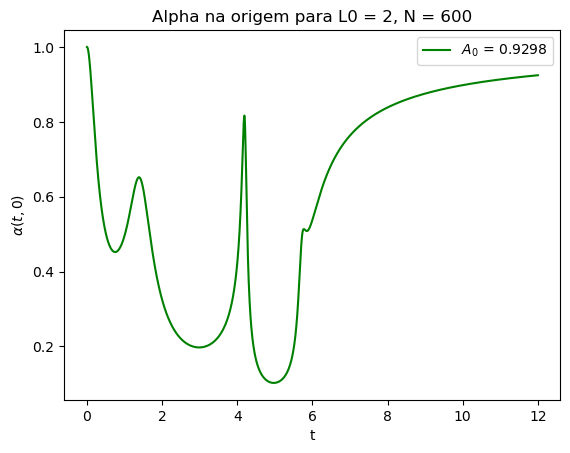

In [7]:
t1 = np.linspace(0, tf, len(Alpha_origin)) 


# Searching for critical amplitude:

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 2, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.legend()

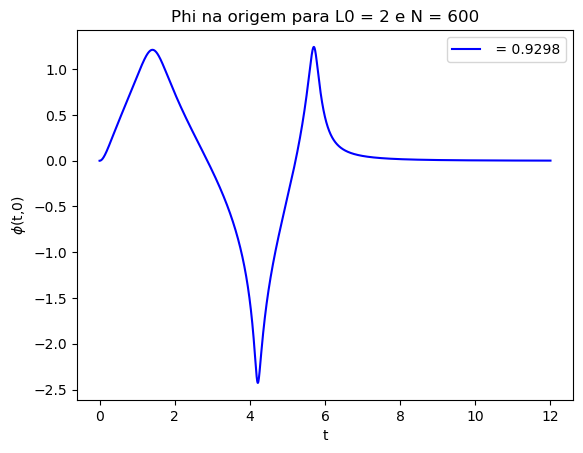

In [9]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")   
plt.legend() 

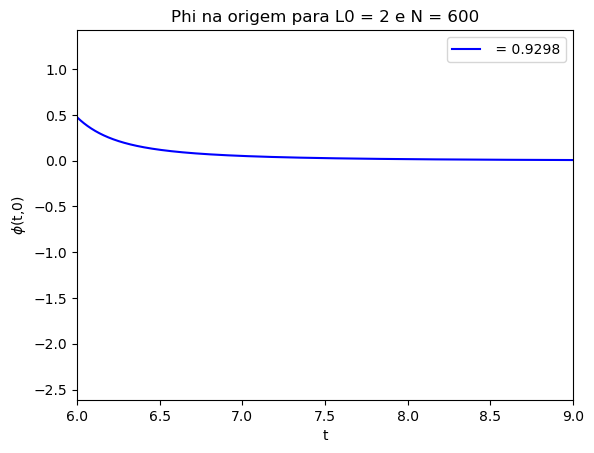

In [10]:
plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")
plt.xlim(6,9)
plt.legend() 

Text(0.5, 1.0, 'log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $')

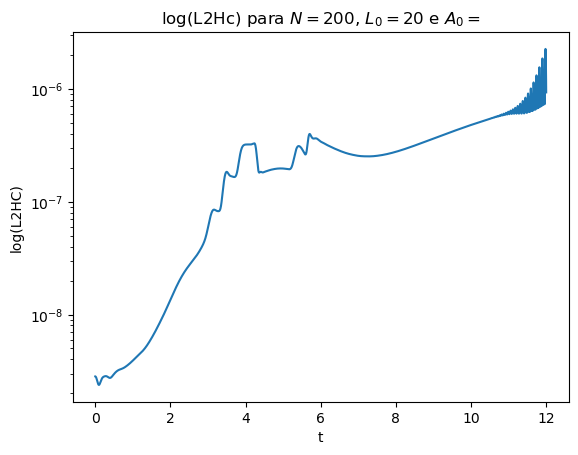

In [11]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.title("log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")